# Project 3 (Students Grades Prediction)

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [157]:
df=pd.read_csv('grades.csv')

In [158]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [159]:
df.tail()


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [160]:
df.columns


Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [162]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [163]:
df['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [164]:
df['HS-101'].unique()

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

In [165]:
y=df['CGPA']

In [166]:
df.drop(['CGPA'],axis=1,inplace=True)

In [167]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [168]:
for i in df.columns:
    df[i]=lb.fit_transform(df[i])

In [169]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,8,6,8,10,9,8,5,...,6,8,8,8,8,2,0,8,3,2
1,1,0,9,10,9,5,6,9,0,10,...,9,10,9,6,9,2,5,6,6,3
2,2,0,3,0,5,4,0,5,4,2,...,2,3,3,0,6,0,0,0,2,0
3,3,9,7,10,9,9,2,10,8,9,...,8,10,6,10,8,5,3,7,7,7
4,4,2,2,2,4,0,0,2,4,0,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,4,2,2,0,0,0,4,4,3,0
567,567,1,0,0,0,0,0,0,2,0,...,2,4,4,0,0,2,3,2,6,2
568,568,3,0,2,4,0,0,0,0,0,...,4,2,3,0,4,0,6,4,2,2
569,569,0,4,9,0,9,10,5,8,5,...,4,9,3,3,8,9,6,3,5,6


In [170]:
df.drop(['Seat No.'],axis=1,inplace=True)

In [171]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [172]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())


In [173]:
df.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
dtype: int64

In [174]:
cor=df.corr()

<Axes: >

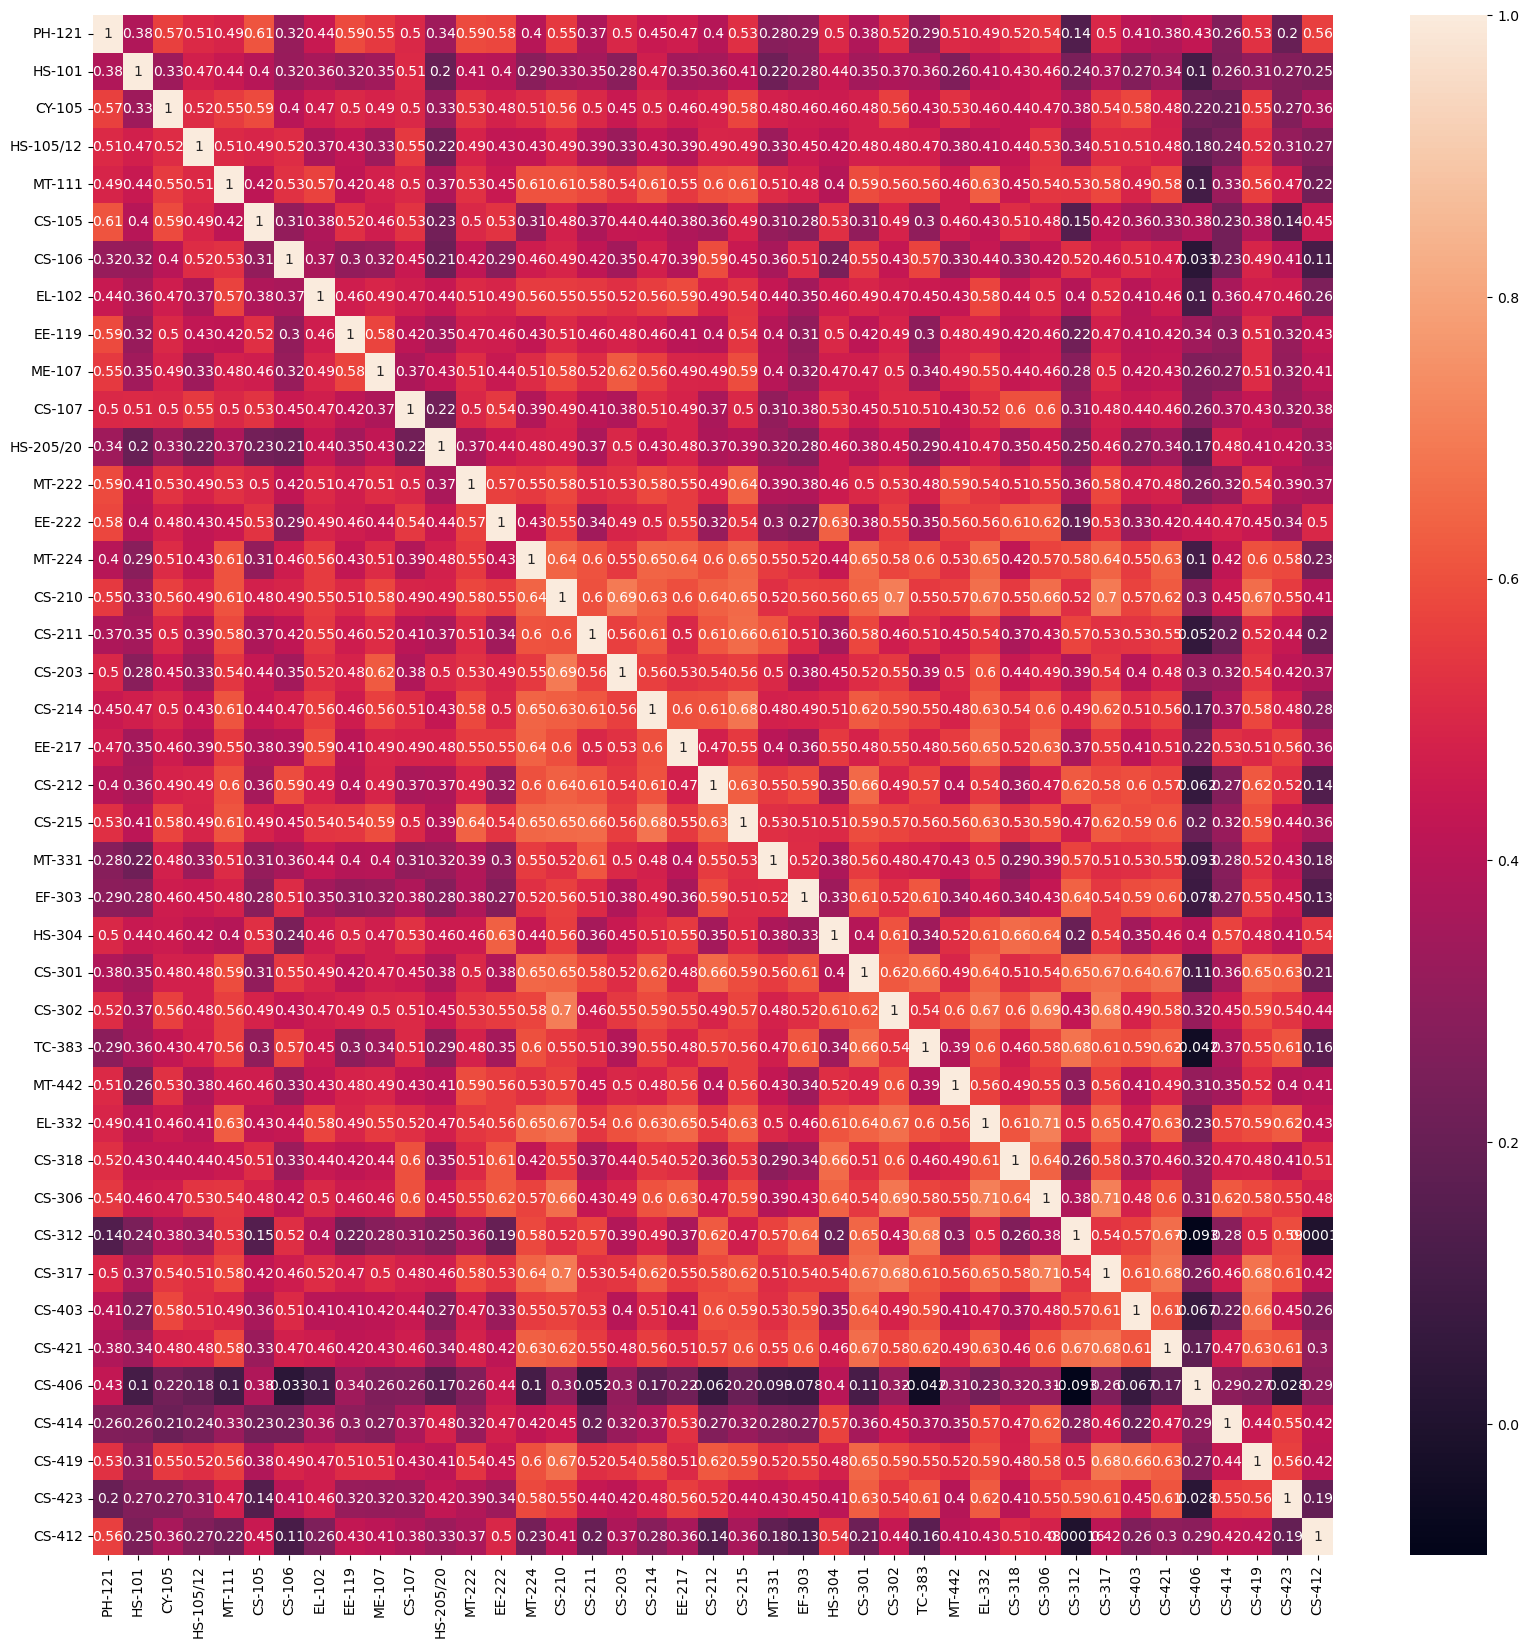

In [175]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

In [176]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)

In [177]:
df=pca.fit_transform(df)

In [178]:
df=pd.DataFrame(df)

In [179]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.694934,-5.276564,-9.252867,2.882464,-0.507651,1.734486,-3.515308,1.529274,-1.155500,-1.288519,-2.305229,1.726832,1.531624,2.080574,0.832779
1,17.083448,-5.999765,-1.458772,-1.153091,-0.301544,-1.834452,-1.198937,-3.426323,3.914375,5.629257,-3.111110,5.512161,0.294131,-6.297461,2.772303
2,-15.453394,-5.236583,0.445009,3.384063,3.941782,1.326431,-0.435349,1.722760,1.935700,-2.829583,-1.676765,-1.089449,-2.265969,-0.277146,-1.290427
3,21.937501,-5.085559,-3.796421,1.306345,1.299114,-1.265683,3.710504,-1.317883,3.144845,-2.585872,2.057735,-1.906347,-3.174850,-2.954245,0.688004
4,-10.058820,-6.203476,-0.888261,0.550622,4.552152,-2.176302,-3.321722,-4.898270,-0.759503,-1.562374,-2.076801,-2.672730,0.225051,1.879861,0.102359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-19.105064,-1.541998,1.593051,0.494632,-0.402001,-0.494155,2.994288,1.509066,2.508827,-0.436203,-0.654584,-1.545567,-1.695849,0.166734,0.690289
567,-18.626426,-0.144402,4.243621,-0.977617,-1.689121,0.762674,6.123321,-2.948184,-0.499960,-0.641743,3.408950,0.130488,1.576621,2.669214,-0.649747
568,-11.073605,1.728772,5.241040,0.854042,-1.467354,-0.808425,3.874496,-0.978528,0.292331,2.177655,-5.041888,1.431728,1.411814,0.780864,-0.478040
569,11.889447,0.636337,0.633013,-5.211217,-1.996302,1.378039,-0.214805,-4.880616,-0.842493,-2.473124,-1.953675,4.220657,-0.785203,0.385859,0.687921


In [180]:
x=df


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [182]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [183]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(456, 15)
(115, 15)
(456,)
(115,)


In [184]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [198]:
pred=lr.predict(xtest)
pred

array([2.1266187 , 3.45192914, 2.79157467, 2.31001006, 3.92942291,
       3.45227633, 2.55307152, 2.39759421, 2.21624652, 3.12090686,
       3.53017548, 3.00633537, 3.7009879 , 2.7143004 , 4.01320591,
       2.67722493, 2.17215224, 3.58103218, 2.13189158, 2.37699988,
       2.47001752, 3.91446121, 2.54078386, 2.50975964, 2.83248353,
       3.19569371, 3.22759712, 2.74827779, 3.39064736, 3.28334863,
       2.76660697, 2.72498504, 3.45959987, 3.22245208, 3.78020236,
       3.00689148, 2.71488666, 3.89414633, 2.85922991, 2.09516777,
       3.68661604, 3.39858562, 3.75788844, 3.66405938, 3.21201524,
       2.20655065, 2.45393439, 3.20962017, 3.20187743, 3.70105724,
       3.07947523, 3.46320567, 3.27064152, 3.62208736, 3.34833412,
       3.02004667, 3.86448649, 3.82121011, 3.63436389, 2.61233001,
       3.67026634, 3.49614832, 3.73022562, 3.42555219, 3.24706108,
       3.08767299, 3.35845869, 3.24416099, 2.83318449, 2.34825142,
       3.67102916, 3.13061368, 2.66558483, 3.74004198, 3.92000

In [186]:
from sklearn.metrics import r2_score

In [187]:
print(r2_score(ytest,pred))

0.9627554905055006


In [188]:
t=np.array([14.694934,-5.276491,-9.252692,2.879817,-0.507925,1.726259,-3.454284,1.625890,-1.135958,-0.989483,-2.745396,1.576327,0.941408,1.872638,-0.29523])

In [189]:
t=t.reshape(1,-1)
t

array([[14.694934, -5.276491, -9.252692,  2.879817, -0.507925,  1.726259,
        -3.454284,  1.62589 , -1.135958, -0.989483, -2.745396,  1.576327,
         0.941408,  1.872638, -0.29523 ]])

In [194]:
predi=lr.predict(t)

In [195]:
predi

array([2.24027476])

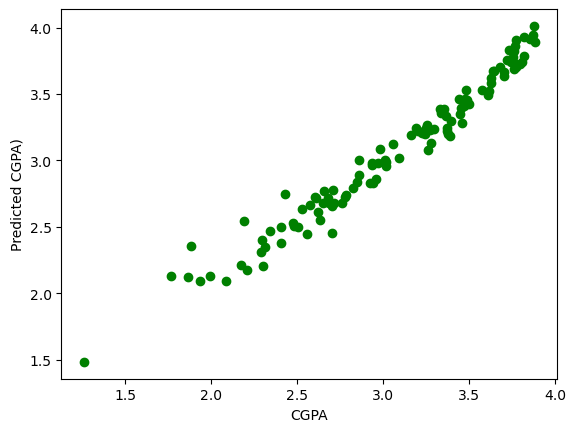

In [208]:
plt.scatter(ytest, pred, color='green')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA)')
plt.show()